In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as  plt

In [17]:
input_folder = 'THE1_Images/'
output_folder = 'THE1_Outputs/'

In [18]:
import cv2

def read_image(filename, gray_scale=False):
    # Read the image in grayscale or color
    if gray_scale:
        img = cv2.imread(input_folder + filename, cv2.IMREAD_GRAYSCALE)
        return img
    img = cv2.imread(input_folder + filename)
    return img


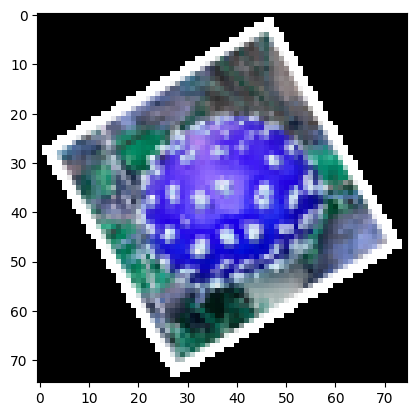

In [20]:
foto = read_image('ratio_4_degree_30.png')
plt.imshow(foto)

In [21]:
def write_image(img, filename):
    # CV2 is just a suggestion you can use other libraries as well
    cv2.imwrite(output_folder+filename, img)

In [22]:
x = read_image("desert1.jpg")
x

array([[[ 59,  80, 111],
        [ 58,  79, 110],
        [ 58,  79, 110],
        ...,
        [ 76,  72,  67],
        [ 71,  67,  62],
        [ 67,  63,  58]],

       [[ 66,  87, 118],
        [ 64,  85, 116],
        [ 64,  85, 116],
        ...,
        [ 73,  69,  64],
        [ 65,  61,  56],
        [ 57,  54,  46]],

       [[ 61,  82, 113],
        [ 60,  81, 112],
        [ 60,  81, 112],
        ...,
        [ 73,  69,  64],
        [ 66,  62,  57],
        [ 59,  54,  51]],

       ...,

       [[ 10,  45,  79],
        [  1,  36,  70],
        [  5,  38,  71],
        ...,
        [ 10,  36,  73],
        [ 10,  41,  80],
        [ 11,  43,  79]],

       [[  9,  46,  80],
        [  0,  35,  69],
        [ 34,  66, 101],
        ...,
        [  5,  33,  68],
        [ 11,  38,  75],
        [ 14,  44,  79]],

       [[  4,  41,  75],
        [  1,  38,  72],
        [ 54,  89, 123],
        ...,
        [  3,  30,  64],
        [  8,  34,  70],
        [ 13,  40,  77]]

In [23]:
x.shape

(430, 512, 3)

In [26]:
import cv2
import numpy as np

def rotate_upsample(img, scale, degree, interpolation_type):
    '''
    img: Image to be rotated and upsampled
    scale: Upsampling scale (e.g., if current width and height is 64x64, and scale is 4,
           the output width and height should be 256x256)
    degree: Degree of rotation (e.g., if degree = 30, the original image was rotated 30 degrees counterclockwise)
    interpolation_type: Type of interpolation ('linear' for bilinear, 'cubic' for bicubic)
    '''



    # Convert BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



    # Determine the interpolation method
    if interpolation_type == 'linear':
        interp = cv2.INTER_LINEAR
    elif interpolation_type == 'cubic':
        interp = cv2.INTER_CUBIC
    else:
        raise ValueError("Interpolation type must be 'linear' or 'cubic'")
    

    # Get the dimensions of the original image
    (h, w) = img.shape[:2]    # h ---> rows    & w ---> columns


    """
    
    # Calculate the new dimensions
    new_w = int(w * scale)
    new_h = int(h * scale)

    # Upsample the image
    upsampled_img = cv2.resizenew_hotationMatrix2D(center, degree, 1.0)

    # Perform the rotation
    corrected_image = cv2.warpAffine(upsampled_img, rotation_matrix, (new_w, new_h))

    return corrected_image

    
    """

    # Upsample the image
    upsampled_img = cv2.resize(img,None, fx= scale,fy=scale, interpolation=interp)

    # Get the center of the image for rotation
    # center_x = w // 2  or center_x = w // 2-1   ---> w // 2 is the more common choice 
    center = (int(w * scale) // 2 , int(h * scale) // 2 )  

    # Create the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center=center, angle=-1*degree, scale=1.0)

    # Perform the rotation
    corrected_image = cv2.warpAffine(upsampled_img, rotation_matrix, (int(w * scale), int(h * scale)))

    return corrected_image
    




def compute_distance(img1, img2):
    '''
    Compute the Mean Squared Error (MSE) between two images.
    img1: First image
    img2: Second image (should be of the same size)
    '''

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
 
    # Ensure both images have the same dimensions
    if img1.shape != img2.shape:
        # Get the shape of img1
        img1_rows, img1_columns = img1.shape[:2]
        
        # Get the shape of img2
        img2_rows, img2_columns = img2.shape[:2]

        # Calculate the cropping coordinates for img2
        y_start = (img2_rows - img1_rows) // 2
        x_start = (img2_columns - img1_columns) // 2

        # Crop img2 to match img1's dimensions
        img2_cropped = img2[y_start:y_start + img1_rows, x_start:x_start + img1_columns]
    else:
        img2_cropped = img2

    # Plotting both images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title('Image 1')
    plt.axis('off')  # Hide axis

    plt.subplot(1, 2, 2)
    plt.imshow(img2_cropped)
    plt.title('Cropped Image 2')
    plt.axis('off')  # Hide axis

    plt.show()
    
    # Compute the Mean Squared Error
    mse = np.mean((img1.astype(np.float32) - img2_cropped.astype(np.float32)) ** 2)
    return mse

In [40]:
image1 = read_image("ratio_4_degree_30.png")
image11 = rotate_upsample(image1, 4, 30, 'linear')
image111 = rotate_upsample(image1, 4, 30, 'cubic')
image1_original = read_image('q1_1.png')

In [35]:
image2 = read_image("ratio_8_degree_45.png")
image21 = rotate_upsample(image2, 8, 45, 'linear')
image211 = rotate_upsample(image2, 8, 45, 'cubic')
image2_original = read_image("q1_2.png")

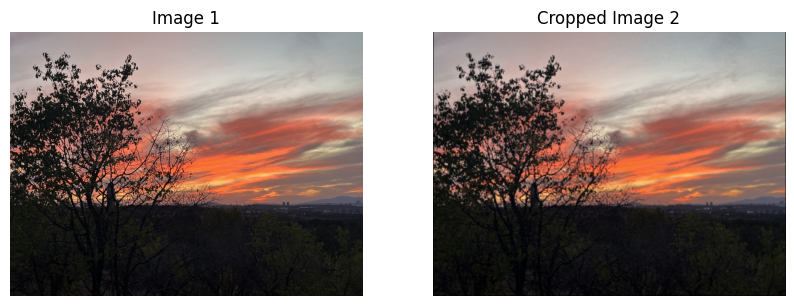

550.0148

In [36]:
compute_distance(image2_original, image21)

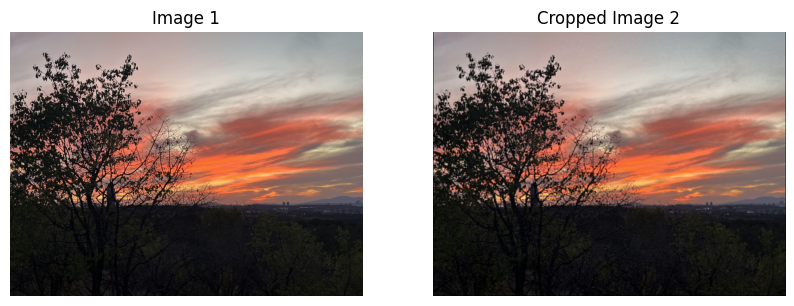

580.83453

In [37]:
compute_distance(image2_original, image211)

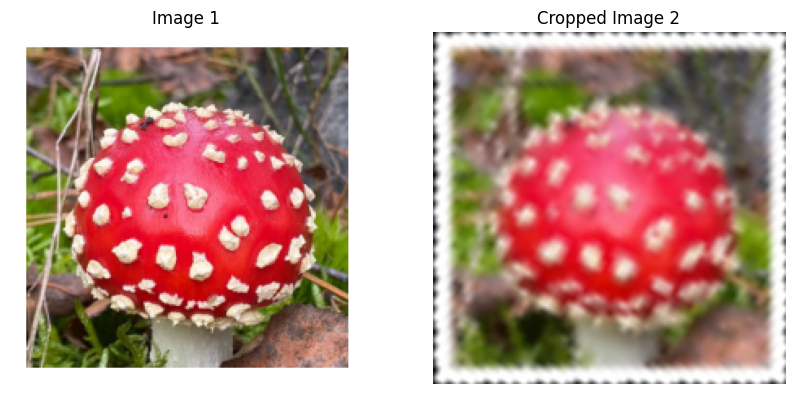

1438.7406

In [41]:
compute_distance(image1_original, image11)

In [42]:
def rgb_to_hsi(image):
    """Convert RGB image to HSI color space."""
    # Normalize the RGB values to [0, 1]
    rgb = image.astype('float') / 255.0
    b, g, r = cv2.split(rgb)

    # Calculate intensity
    I = (r + g + b) / 3.0

    # Calculate hue
    numerator = (r - g) + (r - b)
    denominator = 2 * np.sqrt((r - g) ** 2 + (r - b) * (g - b)) + 1e-10  # Avoid division by zero
    theta = np.arccos(numerator / denominator)
    H = np.zeros_like(I)

    # Assign hue values based on conditions
    H[b <= g] = theta[b <= g]
    H[g < b] = 2 * np.pi - theta[g < b]

    # Calculate saturation
    #S = 1 - (3 / (r + g + b + 1e-10)) * np.minimum(np.minimum(r, g), b)          # (r + g + b + 1e-10)   or I (slides)
    S = 1 - 3 * (np.minimum(r,np.minimum(g,b))) / (I+1e-10)

    # Stack channels to get HSI
    hsi = cv2.merge([H, S, I])
    return hsi


def compute_hue_histogram(hsi, bins=256):   # bins can be change. it depends on the noise
    """Compute the histogram of the hue channel."""
    hue_channel = hsi[:, :, 0]
    hist, _ = np.histogram(hue_channel, bins=bins, range=(0, 2 * np.pi))
    hist = hist.astype('float')
    hist /= hist.sum()  # Normalize the histogram
    return hist




def kl_divergence(p, q):

    # Normalize distributions to ensure they sum to 1
    p = p / np.sum(p) if np.sum(p) > 0 else p
    q = q / np.sum(q) if np.sum(q) > 0 else q
   # RGB values to the range [0, 1]
    # Avoid division by zero in q by clipping
    q = np.clip(q, 1e-10, None)

    # Calculate KL divergence
    divergence = np.sum(np.where(p != 0, p * np.log(p / q+1e-10), 0))

    # Return divergence, ensuring no NaN values are returned
    return divergence if not np.isnan(divergence) else 0


def desert_or_forest(img):
    '''Classify the image as either 'desert' or 'forest'.'''

    # Load database images
    desert1 = read_image('desert1.jpg')
    desert2 = read_image('desert2.jpg')
    forest1 = read_image('forest1.jpg')
    forest2 = read_image('forest2.jpg')

    # Convert images to HSI
    hsi_img = rgb_to_hsi(img)
    hsi_desert1 = rgb_to_hsi(desert1)
    hsi_desert2 = rgb_to_hsi(desert2)
    hsi_forest1 = rgb_to_hsi(forest1)
    hsi_forest2 = rgb_to_hsi(forest2)

    # Compute histograms of the hue channel
    hist_img = compute_hue_histogram(hsi_img)
    hist_desert1 = compute_hue_histogram(hsi_desert1)
    hist_desert2 = compute_hue_histogram(hsi_desert2)
    hist_forest1 = compute_hue_histogram(hsi_forest1)
    hist_forest2 = compute_hue_histogram(hsi_forest2)

    # Compute KL Divergence
    kl_desert1 = kl_divergence(hist_img, hist_desert1)
    kl_desert2 = kl_divergence(hist_img, hist_desert2)
    kl_forest1 = kl_divergence(hist_img, hist_forest1)
    kl_forest2 = kl_divergence(hist_img, hist_forest2)

    # Determine which category has the minimum KL divergence
    desert_kl_min = min(kl_desert1, kl_desert2)
    forest_kl_min = min(kl_forest1, kl_forest2)

    if desert_kl_min < forest_kl_min:
        return 'desert'
    else:
        return 'forest'


In [43]:
image2_1 = read_image("q2_1.jpg")
print(desert_or_forest(image2_1))

image2_2 = read_image("q2_2.jpg")
print(desert_or_forest(image2_2))

desert
forest


In [52]:
def difference_images(img1, img2, threshold=75):
    '''img1 and img2 are the images to take the difference from.
    returns the masked image where the object is highlighted.'''

    # Convert images to grayscale if they are not already
    if len(img1.shape) == 3:
        img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    else:
        img1_gray = img1

    if len(img2.shape) == 3:
        img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    else:
        img2_gray = img2

    # Compute the absolute difference between the two images
    diff = cv2.absdiff(img1_gray, img2_gray)

    # Apply a binary threshold to the difference image
    _, mask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    # Create a masked image where the object is highlighted
    masked_image = cv2.bitwise_and(img2, img2, mask=mask.astype(np.uint8))

    return masked_image


In [64]:
import cv2
import numpy as np

def difference_images_2(img1, img2, threshold=75):
    """
    Calculate the difference between two images and generate a mask showing 
    where an object exists in img2 but not in img1.
    
    Parameters:
    - img1: First image (where object is absent)
    - img2: Second image (where object is present)
    - threshold: Intensity threshold for difference (default is 30)
    
    Returns:
    - mask: Binary mask highlighting the location of the object in img2
    - result: Image where only the object in img2 is highlighted
    """
    # Check if images are grayscale or RGB
    if len(img1.shape) == 2:  # Grayscale images
        diff = cv2.absdiff(img2, img1)
        _, mask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    else:  # RGB images
        # Compute the difference for each channel
        diff = cv2.absdiff(img2, img1)
        
        # Convert to grayscale to simplify thresholding
        diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(diff_gray, threshold, 255, cv2.THRESH_BINARY)
    
    # Apply the mask to img2 to highlight the object
    result = cv2.bitwise_and(img2, img2, mask=mask)
    
    return mask, result


In [65]:
ımage31 = read_image('q3_a1.png')
ımage32 = read_image('q3_a2.png')
ımage33 = read_image('q3_b1.png')
ımage34 = read_image('q3_b2.png')

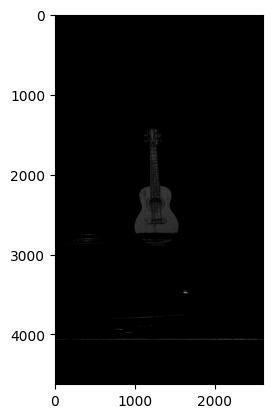

In [66]:
plt.imshow(difference_images(ımage31,ımage32))

In [67]:
mask, output_img = difference_images_2(ımage31,ımage32)

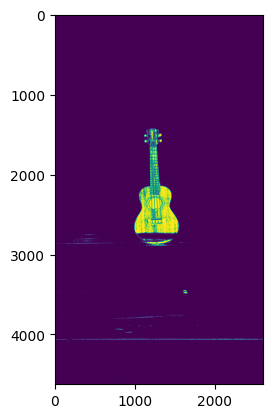

In [68]:
plt.imshow(mask)

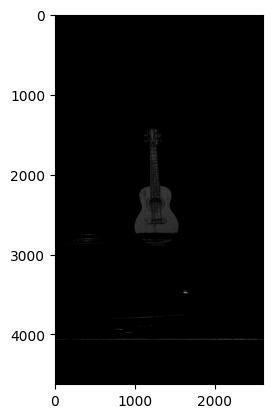

In [69]:
plt.imshow(output_img)

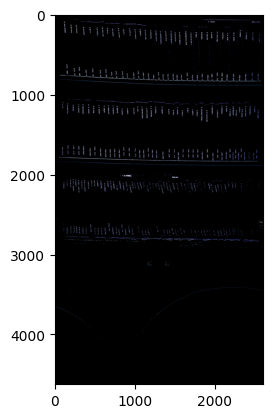

In [54]:
plt.imshow(difference_images(ımage33,ımage34))

In [70]:
mask2, output_img2 = difference_images_2(ımage33,ımage34)

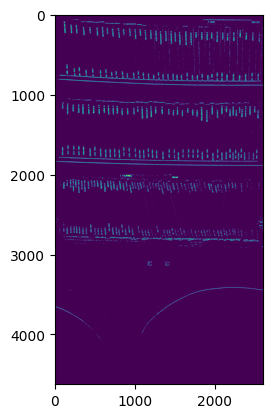

In [71]:
plt.imshow(mask2)

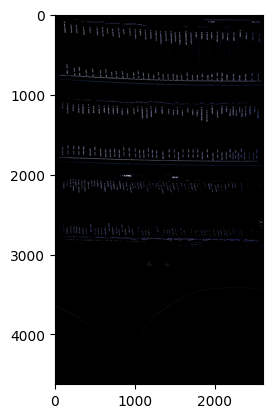

In [72]:
plt.imshow(output_img2)

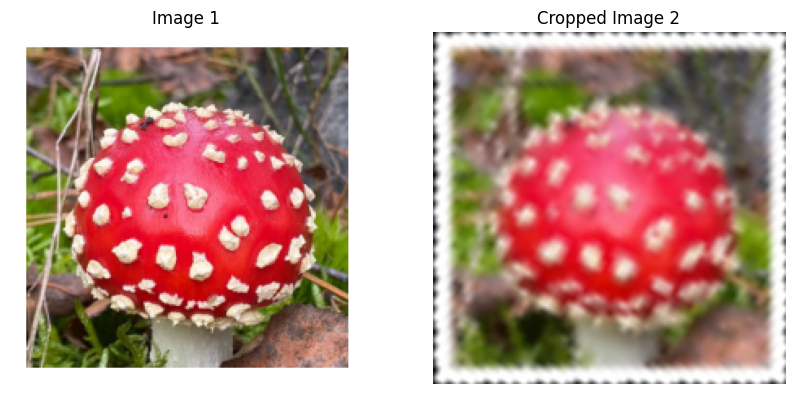

The distance between original image and image corrected with linear interpolation is  1438.7406


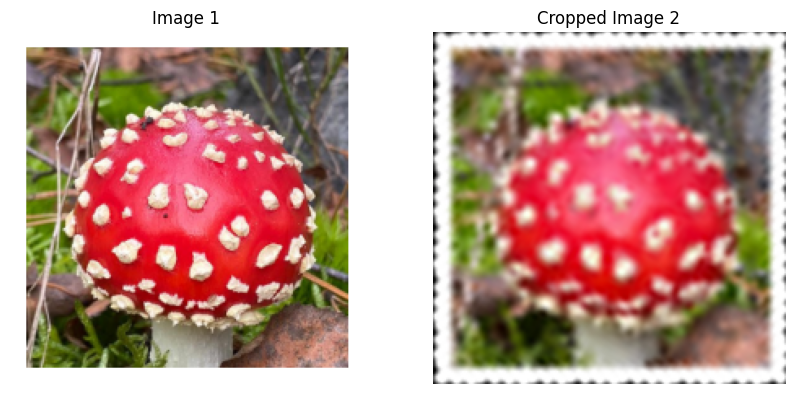

The distance between original image and image corrected with cubic interpolation is  1349.4661


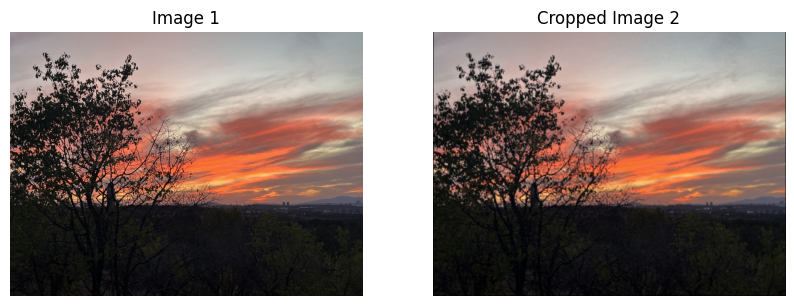

The distance between original image and image corrected with linear interpolation is  550.0148


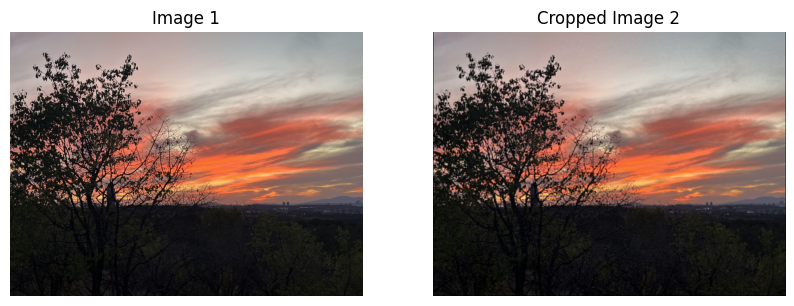

The distance between original image and image corrected with cubic interpolation is  580.83453
Given image q2_1 is an image of a  desert
Given image q2_2 is an image of a  forest


In [73]:
###################### Q1
    # Read original image
img_original = read_image('q1_1.png')
    # Read corrupted image
img = read_image('ratio_4_degree_30.png')
    # Correct the image with linear interpolation
corrected_img_linear = rotate_upsample(img, 4, 30, 'linear')
write_image(corrected_img_linear, 'q1_1_corrected_linear.png')
    # Correct the image with cubic interpolation
corrected_img_cubic = rotate_upsample(img, 4, 30, 'cubic')
write_image(corrected_img_cubic, 'q1_1_corrected_cubic.png')

    # Report the distances
print('The distance between original image and image corrected with linear interpolation is ', compute_distance(img_original, corrected_img_linear))
print('The distance between original image and image corrected with cubic interpolation is ', compute_distance(img_original, corrected_img_cubic))

    # Repeat the same steps for the second image
img_original = read_image('q1_2.png')
img = read_image('ratio_8_degree_45.png')
corrected_img_linear = rotate_upsample(img, 8, 45, 'linear')
write_image(corrected_img_linear, 'q1_2_corrected_linear.png')
corrected_img_cubic = rotate_upsample(img, 8, 45, 'cubic')
write_image(corrected_img_cubic, 'q1_2_corrected_cubic.png')

    # Report the distances
print('The distance between original image and image corrected with linear interpolation is ', compute_distance(img_original, corrected_img_linear))
print('The distance between original image and image corrected with cubic interpolation is ', compute_distance(img_original, corrected_img_cubic))

    ###################### Q2
img = read_image('q2_1.jpg')
result = desert_or_forest(img)
print("Given image q2_1 is an image of a ", result)

img = read_image('q2_2.jpg')
result = desert_or_forest(img)
print("Given image q2_2 is an image of a ", result)

    ###################### Q3
img1 = read_image('q3_a1.png',gray_scale=True)
img2 = read_image('q3_a2.png',gray_scale=True)
result = difference_images(img1,img2)
write_image(result, 'masked_image_a.png')

img1 = read_image('q3_b1.png')
img2 = read_image('q3_b2.png')
result = difference_images(img1,img2)
write_image(result, 'masked_image_b.png')

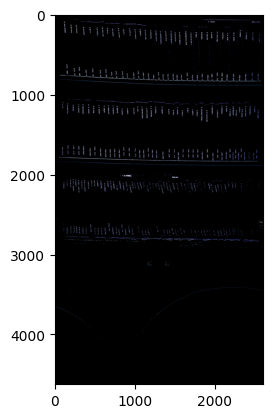

In [74]:
x = cv2.imread(output_folder + 'masked_image_b.png')
plt.imshow(x)

In [ ]:
cv2.imread(input_folder + filename)